# Entanglement entropy in a finite Heisenberg model

In [21]:
using LinearAlgebra, SparseArrays, DelimitedFiles, Plots #,Arpack

#Including the functions to construct a Hamiltonian and calculate the entanglement entropy
include("functions.jl") #MakeHam, RedDens, EntEntr, PopMul, BinDec, FindGS

### Entanglement in the chain with h=0

The interaction matrices:

In [23]:
N=10
jmat = zeros(Float64, N, N, 3);
for a in 1:3
    for i in 1:Int(N-1)
        jmat[i,i+1,a]=jmat[i+1,i,a]=1
    end
end
#jmat

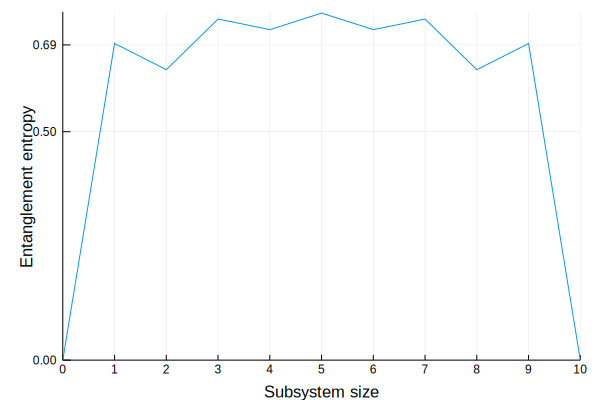

In [26]:
ham = Matrix(MakeHam(jmat,10,0))
eigsys = eigen(ham)
gs=FindGS(eigsys)[:,1]
vals = Array{Float64}(undef, N+1)
for i in 0:N
    vals[i+1]=EntEntr(gs,collect(1:i))
end
plot(0:N,vals,
    ylims=(0,1.1log(2)), xlims=(0,N), 
    xlabel="Subsystem size", ylabel="Entanglement entropy", 
    label="", xticks = 0:1:N, yticks = [0,0.5,0.69])

Sending Jx, Jy to 0

In [29]:
N=8
jmat = zeros(Float64, N, N, 3);
for a in 1:3
    for i in 1:Int(N-1)
        jmat[i,i+1,a]=jmat[i+1,i,a]=1
    end
end
#jmat

In [54]:
function PlotHeis(Jxy,Jz,h,N)
    jmat = zeros(Float64, N, N, 3);
    for a in 1:3
        if a==3
            J=Jz
        else
            J=Jxy
        end

        for i in 1:Int(N-1)
            jmat[i,i+1,a]=jmat[i+1,i,a]=J
        end
    end
    ham = Matrix(MakeHam(jmat,N,h))
    eigsys = eigen(ham)
    gs=FindGS(eigsys)[:,1]
    vals = Array{Float64}(undef, N+1)
    for i in 0:N
        vals[i+1]=EntEntr(gs,collect(1:i))
    end
    vals
end

PlotHeis (generic function with 2 methods)

In [55]:
nop = 10 #number of plots
plotvals = Array{Float64}(undef, N+1, nop)
for i in 1:nop
    plotvals[:,i] = PlotHeis(1-(i-1)/nop,1,0,N)
end
#plot(0:N,plotvals,label="",layout=10)

In [56]:
nop = 10 #number of plots
anim = @animate for i=1:nop
    plot(0:N,PlotHeis(1-(i-1)/nop,1,0,N),ylims=(0,1.07log(2)), xlims=(0,N), 
        xlabel="Subsystem size", ylabel="Entanglement entropy", 
        label="", xticks = 0:1:N, yticks = [0,0.5,0.69])
end
gif(anim, "EntHeisJ-to-0.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /afs/rrz.uni-koeln.de/usr/smail/91/wvanderf/Dokumente/Entanglement-Entropy/EntHeisJ-to-0.gif
└ @ Plots /opt/julia/share/julia/site/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/afs/rrz.uni-koeln.de/usr/smail/91/wvanderf/Dokumente/Entanglement-Entropy/EntHeisJ-to-0.gif")